<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-2/Laboratorios/Laboratorio_05_ABC_Modelo_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer

# Problema:

El dataset de casas de California. Es un conjunto de datos que contiene información sobre los precios medios de las viviendas y otras características de los distritos de California, basado en el censo de 1990.



**longitude**: es la longitud del centroide del distrito, expresada en grados. Esta variable indica la posición geográfica del distrito en el mapa.

**latitude**: es la latitud del centroide del distrito, expresada en grados. Esta variable también indica la posición geográfica del distrito en el mapa.

**housing_median_age**: es la edad media de las casas en el distrito, expresada en años. Esta variable refleja el estado y la antigüedad de las viviendas en el distrito.

**total_rooms**: es el número total de habitaciones en el distrito, sin distinguir entre tipos de habitaciones. Esta variable refleja el tamaño y la capacidad de las viviendas en el distrito.

**total_bedrooms**: es el número total de dormitorios en el distrito. Esta variable refleja el número de espacios destinados al descanso en las viviendas del distrito.

**population**: es el número de personas que viven en el distrito. Esta variable refleja la densidad y la demanda de vivienda en el distrito.


**households**: es el número de hogares en el distrito. Un hogar es un grupo de personas que residen dentro de una casa. Esta variable refleja la estructura y la composición de las familias en el distrito.


**median_income**: es el ingreso medio por hogar en el distrito, expresado en miles de dólares ($1000). Esta variable refleja el nivel socioeconómico y el poder adquisitivo de los habitantes del distrito.


**median_house_value**: es el valor medio de las casas en el distrito, expresado en cientos de miles de dólares ($100,000). Esta variable es la variable objetivo que se quiere predecir. Refleja el precio y la calidad de las viviendas en el distrito.


# 1.0 Análisis del data frame

1. Leer el data frame en formato csv en la dirección https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv

2. Entender  el estado de los datos, para ello puedo emplear los comandos básicos del pandas

  ```python
  df.info()
  df.describe()
  df.isnull().sum()
  df.isna().sum()
```
Estos dos últimos son equivalentes.

3. Determinar los elementos únicos dentro de la columna ocean_proximity.


4. Para las columnas

```python
cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]
```

Determinar el promedio de cada una de las columnas asociado a cada elementos unico de ocean_proximity, intenta con la operación groupby.


5. Construye un histograma para cada columna, puede emplear la libreria de seaborn.

In [30]:
# 1. Cargar el dataset desde un archivo CSV
data_url = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Sesion_07_housing.csv"
df = pd.read_csv(data_url)

In [31]:
# Mostrar las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
df.head()

Primeras filas del DataFrame:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [32]:
# Describir el DataFrame
print("\nDescripción estadística del DataFrame:")
df.describe()


Descripción estadística del DataFrame:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [33]:
# Verificar si hay valores nulos en el DataFrame
print("\nValores nulos en el DataFrame:")
df.isna().sum()


Valores nulos en el DataFrame:


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [34]:
# Elementos unicos de la columna 'ocean_proximity'
print("\nElementos únicos de la columna 'ocean_proximity':")
df['ocean_proximity'].unique()


Elementos únicos de la columna 'ocean_proximity':


array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [35]:
# 4. Promedio de cada una de las columnas asociadas a los elementos únicos de 'ocean_proximity'

cols = ["housing_median_age",	"total_rooms",	"total_bedrooms",	"population",	"households",	"median_income",	"median_house_value"]

for category in df['ocean_proximity'].unique():
    print(f"\nPromedios para la categoría '{category}':")
    subset = df[df['ocean_proximity'] == category]
    means = subset[cols].mean()
    print(means)



Promedios para la categoría 'NEAR BAY':
housing_median_age        37.730131
total_rooms             2493.589520
total_bedrooms           514.182819
population              1230.317467
households               488.616157
median_income              4.172885
median_house_value    259212.311790
dtype: float64

Promedios para la categoría '<1H OCEAN':
housing_median_age        29.279225
total_rooms             2628.343586
total_bedrooms           546.539185
population              1520.290499
households               517.744965
median_income              4.230682
median_house_value    240084.285464
dtype: float64

Promedios para la categoría 'INLAND':
housing_median_age        24.271867
total_rooms             2717.742787
total_bedrooms           533.881619
population              1391.046252
households               477.447565
median_income              3.208996
median_house_value    124805.392001
dtype: float64

Promedios para la categoría 'NEAR OCEAN':
housing_median_age        29.34725

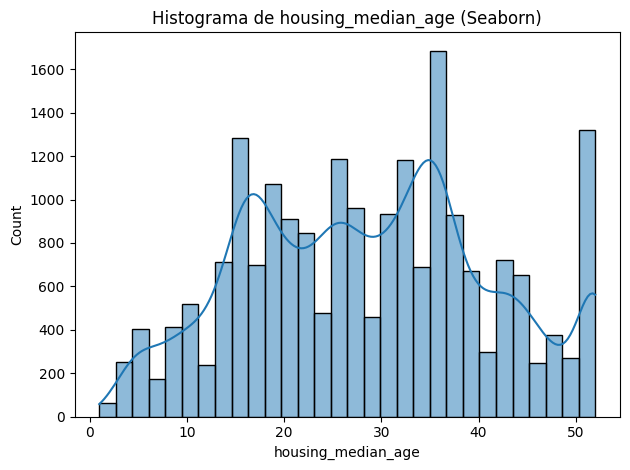

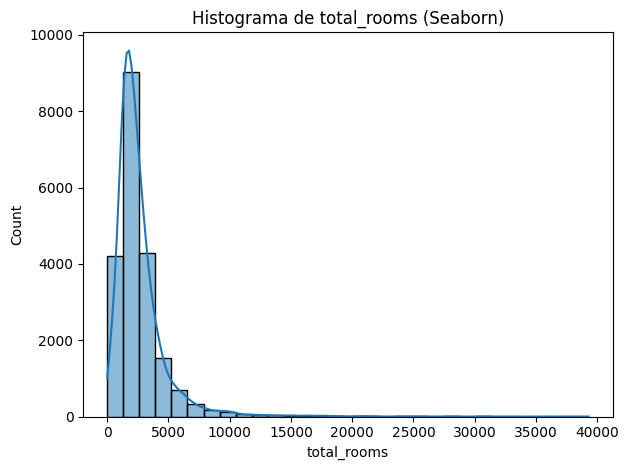

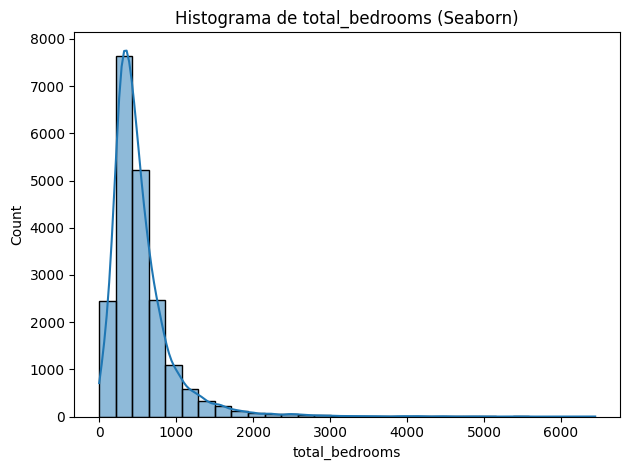

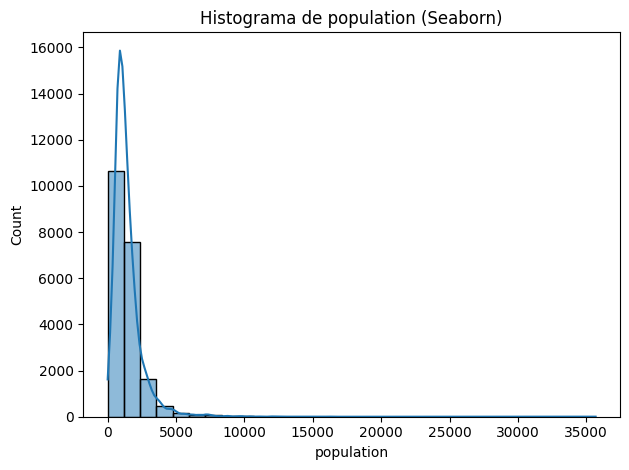

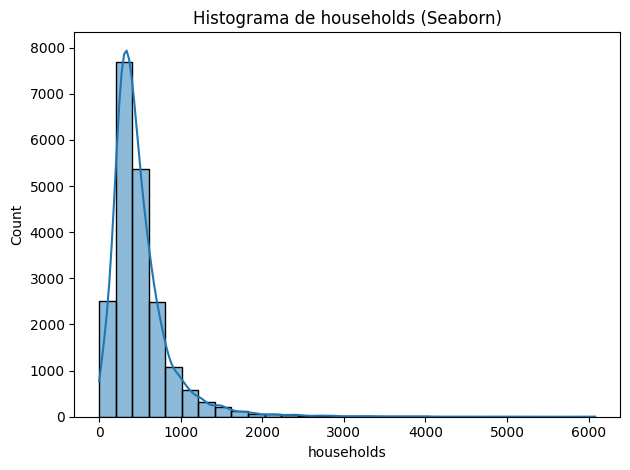

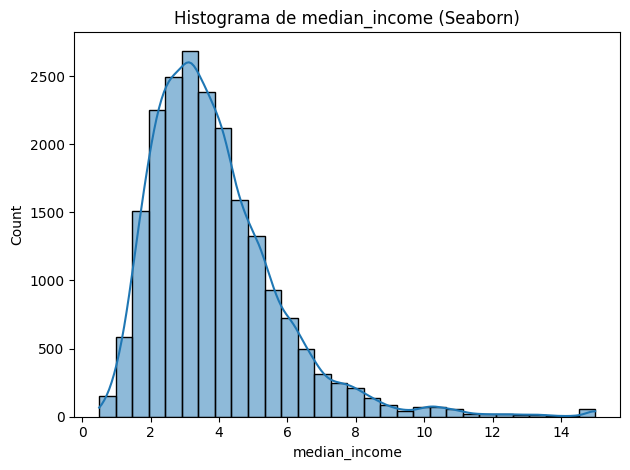

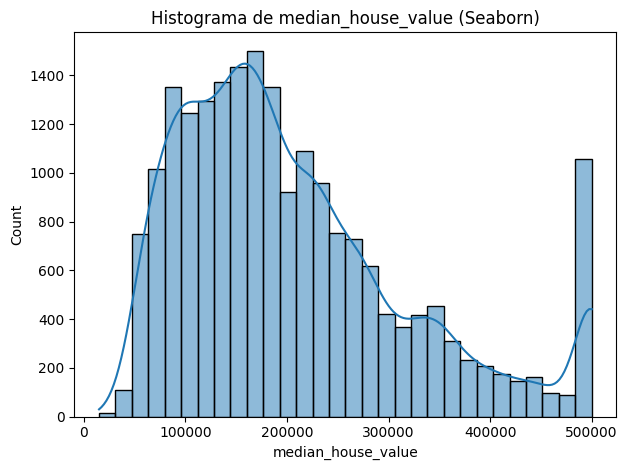

In [36]:
# 5. Crear histogramas para cada una de las columnas numéricas usando seaborn

for col in cols:
    plt.figure()  # Creamos el lienzo nuevo
    sns.histplot(data=df, x=col, bins=30, kde=True) # Creamos el histograma con seaborn   
    plt.title(f'Histograma de {col} (Seaborn)')
    plt.tight_layout()  # Ajustamos para que se vea bonito
    plt.show()          # Mostramos el gráfico    

### [Diagrama de caja](https://en.wikipedia.org/wiki/Box_plot)


### Diagrama de caja

![box](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/800px-Boxplot_vs_PDF.svg.png)



### Interpretación de un diagrama de caja

- Desde el minimo al valor más bajo de la caja: primer cuartil, 25% de los datos
- Desde el valor más bajo de la caja hasta la mediana: segundo cuartil, 25% de los datos
- Desde la mediana hasta el valor mas alto de la caja : tercer cuartil, 25% de los datos
- Desde el valor mas alto de la caja hasta el máximo: Cuarto  cuartil, 25% de los datos


El rango intercuartil $IQR = Q_3-Q_1$ permite definir que datos pueden ser atípicos, basado en los siguientes limites:

$Max = Q3 + 1.5IQR$

$Min = Q1 - 1.5IQR$



El cuartil puede ser determinado como sigue:

Para calcular los cuartiles de una lista de números:

- Ordenar los números de menor a mayor.
- Calcular la posición de cada cuartil usando la fórmula: Q = a (N+1) / 4, donde Q es la posición del cuartil, a es el número del cuartil (1, 2 o 3), y N es el número total de datos.
- Si la posición del cuartil es un número entero, el valor del cuartil es el dato que está en esa posición.
- Si la posición del cuartil es un número decimal, el valor del cuartil se interpola usando la fórmula: Q = x + d (y - x), donde Q es el valor del cuartil, x es el dato anterior a la posición del cuartil, y es el dato posterior a la posición del cuartil, y d es la parte decimal de la posición del cuartil.


Veamos un ejemplo:



In [37]:
T = np.array([52, 57, 57, 58, 63, 66, 66, 67, 67, 68, 69, 70, 70, 70, 70, 72, 73, 75, 75, 76, 76, 78, 79, 89])
Tsort = np.sort(T)
print(len(T))
print(f"T sort:{Tsort}")
len(T)/4

24
T sort:[52 57 57 58 63 66 66 67 67 68 69 70 70 70 70 72 73 75 75 76 76 78 79 89]


6.0

88.5
52.5


{'whiskers': [<matplotlib.lines.Line2D at 0x7cbcb8a61d60>,
 'caps': [<matplotlib.lines.Line2D at 0x7cbcb8a62420>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cbcb8a61b80>],
 'medians': [<matplotlib.lines.Line2D at 0x7cbcb8a62a20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cbcb8a62cc0>],
 'means': []}

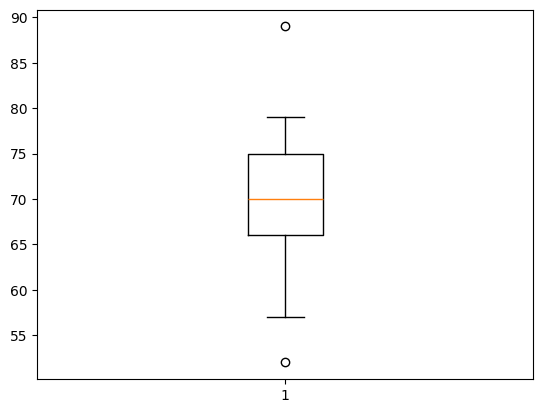

In [38]:

IQR=9
max_ = 75 + 1.5*IQR
min_ = 66 - 1.5*IQR
print(max_)
print(min_)
plt.boxplot(T)

7. Empleando el siguiente código realiza el gráfico boxplot,
```python
#draw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()
```

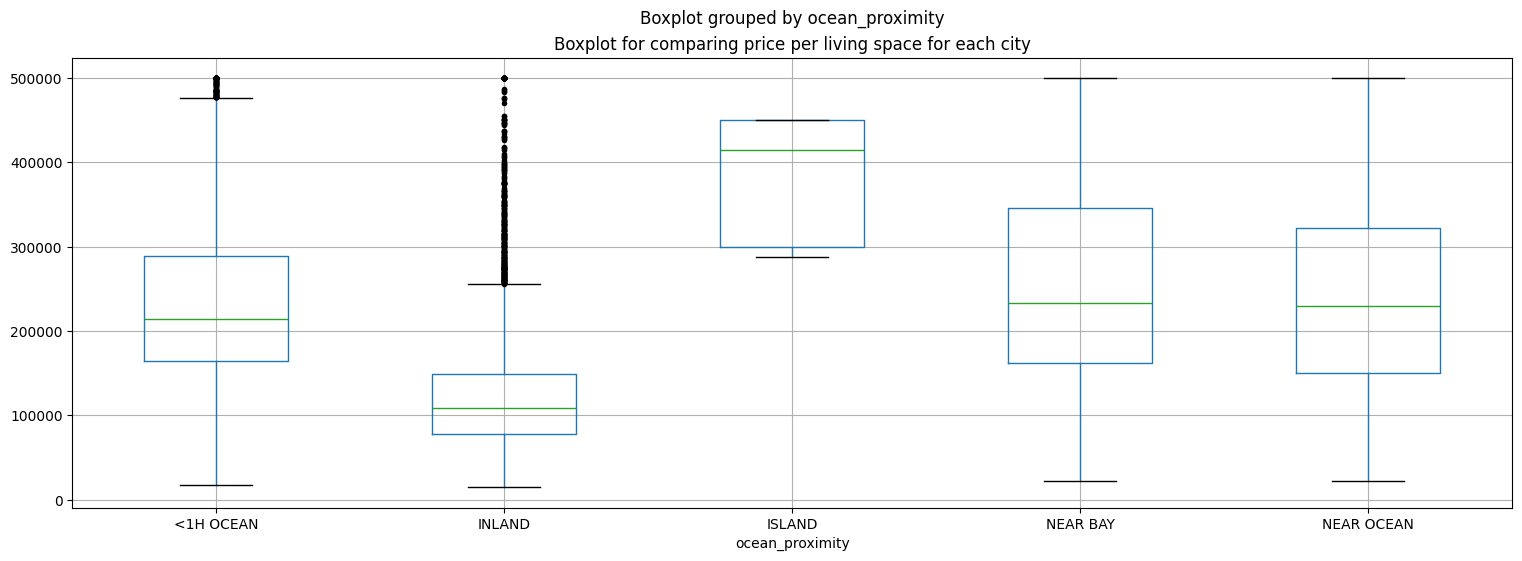

In [43]:
#d 7. raw boxplot
df.boxplot(column="median_house_value", by='ocean_proximity', sym = 'k.', figsize=(18,6))
#set title
plt.title('Boxplot for comparing price per living space for each city')
plt.show()

8. Determina la matrix de correlación.

### [Matrix de correlación](https://en.wikipedia.org/wiki/Correlation)

¿Como se determina la matrix de correlación?

![Matrix de correlación](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png)



```python
corr_matrix = df.corr()
corr_matrix

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()
```

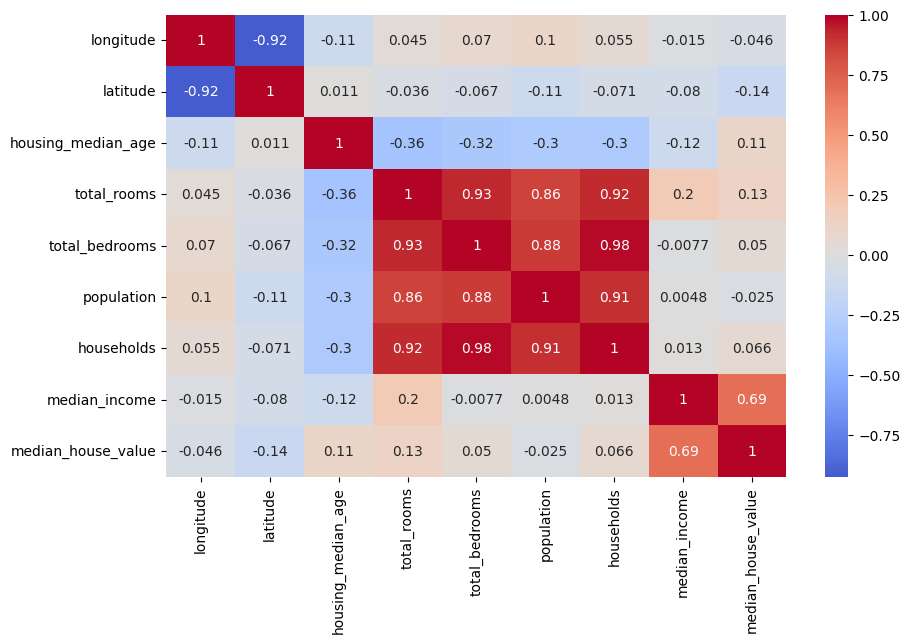

In [44]:
# 8. Matriz de correlación con seaborn heatmap
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", center=0)
plt.show()

9. con las columnas, realiza un grafico pairplot empleando seaborn  de python.
```python
cols = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
```

10. Realiza un scatter plot con la libreria sea born de python, el color del grafico puede ser empleado con la columna median_house_value

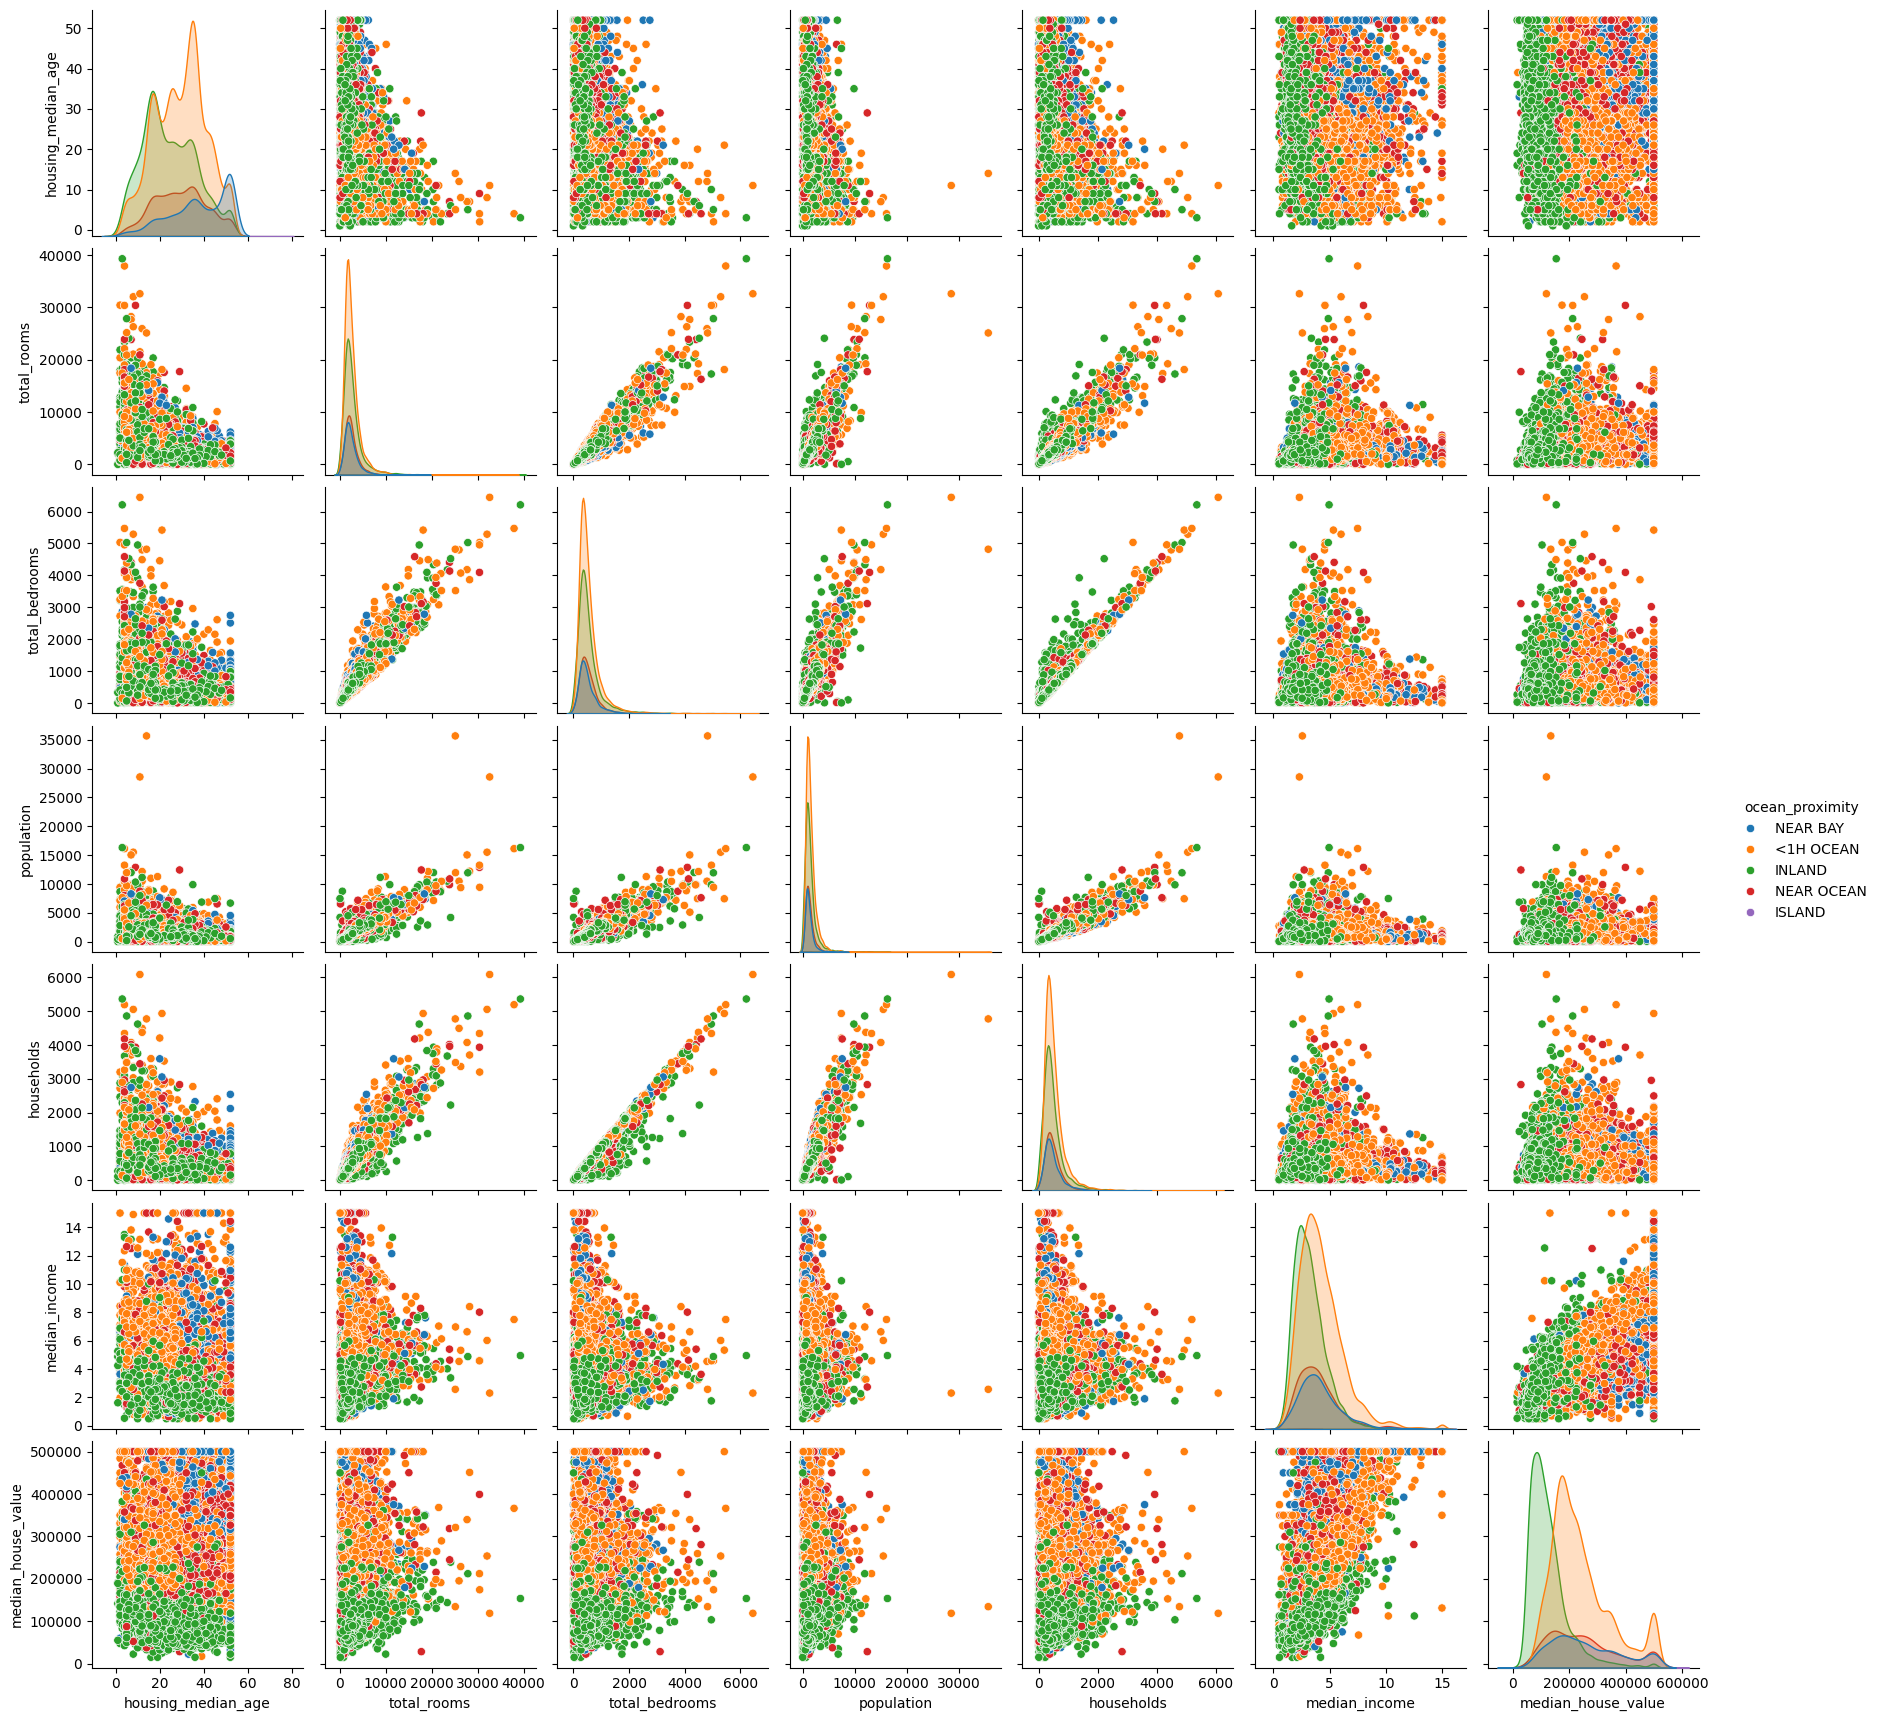

In [45]:
# 9. Gráfico pairplot con seaborn
sns.pairplot(df[cols + ['ocean_proximity']], hue='ocean_proximity', diag_kind='kde')
plt.show()

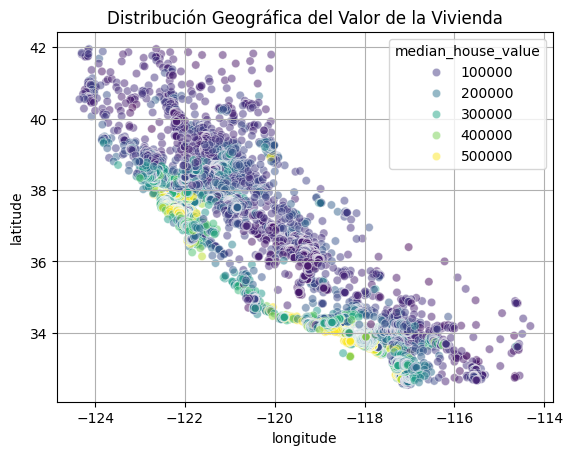

In [50]:
# 10. Gráfico de dispersión (scatter plot) con 'median_house_value'
sns.scatterplot(
    data=df,
    x="longitude",            # Eje horizontal geográfico
    y="latitude",             # Eje vertical geográfico
    hue="median_house_value", # El color según el precio
    palette="viridis",        # Paleta de colores
    alpha=0.5                 # Transparencia de los puntos
)

# 3. Añadimos detalles y mostramos
plt.title("Distribución Geográfica del Valor de la Vivienda")
plt.grid()
plt.show()

# 2.0 Preparacion del data frame

## Evitar el data *Snooping bias*.

En algunos casos se sugiere dividir los datos en entrenamiento y test desde el principio dado que el cerebro puede sobreajustar el dataset y los resultados no significativos se pueden volver significativos. El procedimiento correcto es probar cualquier hipótesis en un conjunto de datos que no se utilizó para generar las hipótesis inicial.


## *Sampling bias*

Si el dataset es lo suficientemente grande un muestreo aleatorio de la muestra puede ser considerado, sin embargo si la muestra es pequena se debe garantizar homegeniedad en el dataset de entrenamiento.


Ejemplo:

Por ejemplo, la población de EE. UU. esta compuesto por un 51,3 % de mujeres y un 48,7 % de hombres, por lo que una encuesta bien realizada en EEUU
trata de mantener esta proporción en la muestra: 513 mujeres y 487 hombres. Esto se llama muestreo estratificado(stratified sampling): la población se divide en subgrupos homogéneos llamados estratos(strata), y se muestrea el número correcto de instancias de cada estrato para garantizar que el
El conjunto de prueba es representativo de la población general. Si usaran muestras puramente aleatorias, habría alrededor del 12% de posibilidades de muestrear un conjunto de prueba sesgado con menos del 49% de mujeres o más del 54% de mujeres. De cualquier manera, los resultados de la encuesta serían
significativamente sesgada.


11. ¿Las siguiente linea es adecuada para separar el dataframe en datos de entrenamiento de test?, ¿que pasa en la división de los datos?


```python
from sklearn.model_selection import train_test_split

# ¿Es significativa la muestra que se esta considerando?
train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 42)

print(len(train_set))
print(len(test_set))

```


12. División del dataset en grupos:


La siguiente división puede ser realizada  basada en la experticie de lo que se esta analizando, y sobre ello se debe tomar una muestra significativa. Una posible solución al problema puede ser el siguiente:

```python
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


df.income_cat.hist()


```

La forma automatica de realizar la división puede ser la siguiente:

```python
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]

```


Analiza las siguiente lineas de código y saca conclusiones referente a las proporciones del dataset.

```python
df["income_cat"].value_counts() / len(df)

strat_train_set["income_cat"].value_counts() / len(strat_train_set)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)


train_set, test_set \
  = train_test_split(df, test_size = 0.2, random_state = 7)


train_set["income_cat"].value_counts() / len(train_set)
```

un comparativo general puede ser estructurado de la siguente forma, analiza  los errores:

```python
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] =abs( 100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] =abs( 100 * compare_props["Stratified"] / compare_props["Overall"] - 100)
```

In [62]:
# 11. División por Muestreo Aleatorio Simple
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

print(f"Datos de entrenamiento: {len(train_set)}")
print(f"Datos de prueba: {len(test_set)}")

Datos de entrenamiento: 16512
Datos de prueba: 4128


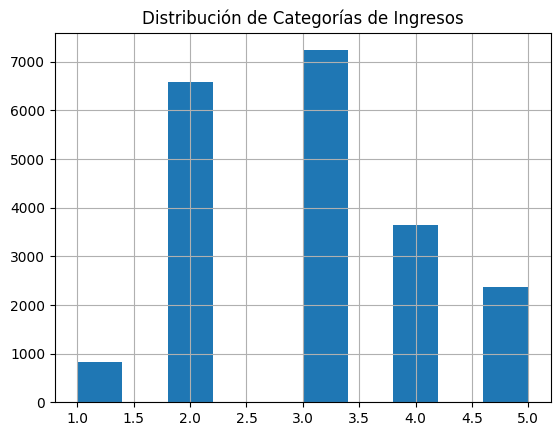

             Overall  Stratified    Random  Rand. %error  Strat. %error
income_cat                                                             
1           0.039826    0.039971  0.040213      0.973236       0.364964
2           0.318847    0.318798  0.324370      1.732260       0.015195
3           0.350581    0.350533  0.358527      2.266446       0.013820
4           0.176308    0.176357  0.167393      5.056334       0.027480
5           0.114438    0.114341  0.109496      4.318374       0.084674


In [63]:
# 12. División Estratificada Basada en una Variable Continua (median_income)

# 1. CREAR LA VARIABLE DE CATEGORÍAS (income_cat)
df["income_cat"] = pd.cut(df["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

# 2. MOSTRAR EL HISTOGRAMA DE CATEGORÍAS
plt.figure()
df.income_cat.hist()
plt.title("Distribución de Categorías de Ingresos")
plt.show()

# 3. REALIZAR LA DIVISIÓN ESTRATIFICADA (La forma automática)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

# 4. ANÁLISIS DE PROPORCIONES Y ERRORES (El comparativo)

# Función auxiliar para calcular porcentajes
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

# Creamos también un set aleatorio para comparar (del punto 11)
train_set_random, test_set_random = train_test_split(df, test_size=0.2, random_state=42)

# Creamos la tabla comparativa
compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),                  # Realidad
    "Stratified": income_cat_proportions(strat_test_set),   # Método Estratificado
    "Random": income_cat_proportions(test_set_random),      # Método Aleatorio
}).sort_index()

# Calculamos los errores porcentuales
compare_props["Rand. %error"] = abs(100 * compare_props["Random"] / compare_props["Overall"] - 100)
compare_props["Strat. %error"] = abs(100 * compare_props["Stratified"] / compare_props["Overall"] - 100)

# Imprimimos la tabla final
print(compare_props)

# 5. LIMPIEZA (Borrar la columna temporal income_cat)
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

13. Puedes agregar nuevas variables al dataframe para el análisis, por ejemplo:
```python
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]
```




# Limpieza de datos

Lo que sigue son códigos que pueden servir para limpiar los datos.

```python

df.isnull().sum()


#df_train.dropna(subset=["total_bedrooms"]) #Eliminar los nan
#df_train.drop("total_bedrooms", axis=1)  # Eliminar la columna
median = df_train["total_bedrooms"].median()
q=df_train["total_bedrooms"].fillna(median).copy()


q=pd.DataFrame(q)

q.isnull().sum()

```

##imputer

Forma automática para tratar los datos (Asegurate de trabajar con las columnas numéricas):


```python
from sklearn.impute import SimpleImputer
#imputer = Imputer(strategy="median")

df_train_num = df_train.drop("ocean_proximity", axis=1)

imp_mean = SimpleImputer( strategy='mean')

imp_mean.fit(df_train_num)

imp_mean.statistics_
```

14. Compara las siguientes variables:
```python
imp_mean.statistics_
df_train_num.median()
```


```python
Constuye la matriz de características:

X = imp_mean.transform(df)
housing_tr = pd.DataFrame(X, columns=df_train_num.columns)
```


# Manejo de texto y atributos categóricos
15.  ¿Qué realizan las siguientes lineas de código?

```
from sklearn.preprocessing import OneHotEncoder
df_train["ocean_proximity"].unique()
housing_cat=df_train[["ocean_proximity"]]
housing_cat

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
print(housing_cat_1hot)
print(cat_encoder.categories_)


df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

housing_tr_ = housing_tr.join(df_cat_1hot)
```


# Escalamiento de variables

16. Las variables pueden ser escaladas como sigue:

```python

cols=["longitude", "latitude",	"housing_median_age",	"total_rooms",\
      "total_bedrooms",	"population",	"households",	"median_income",\
      "<1H OCEAN",	"INLAND",	"ISLAND",	"NEAR BAY", "NEAR OCEAN"]


housing_scale=housing_tr_[cols]
housing_scale


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(housing_scale)

X = scaler.transform(housing_scale)


housing_prepared = pd.DataFrame(X, columns = housing_scale.columns)

```


17. Para todos los pasos anteriores, contruye ordenadamente los pasos limpieza, escalamiento de variables, manejo de texto y atributos categóricos para tener el data frame listo para el análisis. Recuerda dividir el data frame en datos de entrenamiento y de test con la correcta estractificación. Genera dos data frame: housing_train, housing_test, cada una, debe tener las caracteristicas y los datos etiquetados.

1. ¿que puede concluir respecto al modelo empleado?
2. ¿El modelo de regresión lineal es valido para lo construido,
3. ¿qué informacion nos da el score?
4. ¿Puede ser ajustado a otro modelo?
5. ¿Como puede autmatizar todo el proceso empleando pipelines?






In [64]:
# 13. Agregar nuevas características al DataFrame

# Primero: Hacemos una copia de trabajo para no dañar el set original
df_train = strat_train_set.copy()

# Ahora creamos las variables nuevas
df_train["rooms_per_household"] = df_train["total_rooms"] / df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"] / df_train["total_rooms"]
df_train["population_per_household"] = df_train["population"] / df_train["households"]

# Veamos la correlación de estas nuevas variables con el precio
corr_matrix = df_train.corr(numeric_only=True)
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64


In [79]:
# Separamos los datos numéricos (quitamos 'ocean_proximity')
housing_num = df_train.drop("ocean_proximity", axis=1)

# Configuramos el Imputer
# Usamos 'median' porque es más robusta a valores extremos que la media
imputer = SimpleImputer(strategy="median")

# Calculamos las medianas (Fit)
imputer.fit(housing_num)

# Verificamos qué medianas calculó para cada columna
print("Medianas calculadas por el imputer:")
print(imputer.statistics_)

# Rellenamos los huecos (Transform)
X = imputer.transform(housing_num)

# Reconstruimos el DataFrame limpio
housing_tr = pd.DataFrame(data=X, columns=housing_num.columns, index=housing_num.index)

# Comprobamos que ya no hay nulos
print("\n¿Quedan valores nulos?:")
print(housing_tr.isnull().sum())

Medianas calculadas por el imputer:
[-1.18510000e+02  3.42600000e+01  2.90000000e+01  2.11900000e+03
  4.33000000e+02  1.16400000e+03  4.08000000e+02  3.54155000e+00
  1.79500000e+05  5.23234164e+00  2.03027043e-01  2.81766108e+00]

¿Quedan valores nulos?:
longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64


In [80]:
# 14. Comparación  

# Si en el paso anterior usamos strategy='median', comparamos con la mediana.
# Si usaste strategy='mean', compara con .mean()

# Verificamos qué calculó el Imputer (almacenado en .statistics_)
print("Valores calculados por el Imputer:")
print(imputer.statistics_)

# Calculamos manualmente con Pandas para corroborar
print("\nMedianas calculadas con Pandas:")
# Usamos housing_num porque df_train_num o df podrían no estar definidos igual en tu sesión
print(housing_num.median().values)

# Conclusión visual: Deberían ser dos listas de números IDÉNTICAS.


# Construir la Matriz (Transformación)

# Aplicamos la transformación para rellenar los huecos (NaN)
# IMPORTANTE: Usamos 'housing_num' (solo números), no 'df' (que tiene texto)
X = imputer.transform(housing_num)

# Reconstruimos el DataFrame bonito con sus nombres de columnas
housing_tr = pd.DataFrame(X,
                          columns=housing_num.columns,
                          index=housing_num.index) # type: ignore

print("\nPrimeras filas del DataFrame transformado (housing_tr):")
print(housing_tr.head())

Valores calculados por el Imputer:
[-1.18510000e+02  3.42600000e+01  2.90000000e+01  2.11900000e+03
  4.33000000e+02  1.16400000e+03  4.08000000e+02  3.54155000e+00
  1.79500000e+05  5.23234164e+00  2.03027043e-01  2.81766108e+00]

Medianas calculadas con Pandas:
[-1.18510000e+02  3.42600000e+01  2.90000000e+01  2.11900000e+03
  4.33000000e+02  1.16400000e+03  4.08000000e+02  3.54155000e+00
  1.79500000e+05  5.23234164e+00  2.03027043e-01  2.81766108e+00]

Primeras filas del DataFrame transformado (housing_tr):
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   

       p

In [82]:
# 15. Significado de las siguientes lineas de código

df_train["ocean_proximity"].unique()         # 1. Inspecciona qué categorías existen (ej: 'INLAND', 'NEAR BAY'...)
housing_cat = df_train[["ocean_proximity"]]  # 2. Aísla esa columna en un DataFrame pequeño

In [83]:
# 3. Inicializa el codificador
# sparse_output=False obliga a que nos devuelva una matriz "densa" (normal) de Numpy
# en lugar de una matriz comprimida (dispersa). Esto facilita verlo.
cat_encoder = OneHotEncoder(sparse_output=False)

# 4. Aprende las categorías y transforma el texto a unos y ceros
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [84]:
# 5. Convierte la matriz de números (numpy) de vuelta a un DataFrame de Pandas.
# Usa cat_encoder.categories_[0] para ponerle los nombres correctos a las columnas (<1H OCEAN, INLAND, etc.)
df_cat_1hot = pd.DataFrame(housing_cat_1hot, columns = cat_encoder.categories_[0])

# 6. Pega (Une) las nuevas columnas numéricas al lado de tus datos numéricos anteriores.
housing_tr_ = housing_tr.join(df_cat_1hot)